<a href="https://colab.research.google.com/github/Lukec-lehighu/CSE337-Labs/blob/main/lab3_TD_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: Temporal Difference Learning

In this lab, we will practice TD Learning methods, including SARSA and Q-Learning. Both are tabular methods that work on finite MDP.

We will solve the cliff problem: https://gymnasium.farama.org/environments/toy_text/cliff_walking/#is_slippy


The following code runs in colab, if you want to see the animation, you have to run it using python locally on your computer and replacing render_mode="ansi" for render_mode="human".

Thef follwing code runs the cliff problem using a random policy.

In [1]:
import gymnasium as gym

# Create the environment
env = gym.make("CliffWalking-v0", render_mode="human")

n_episodes = 5      # number of episodes to run
max_steps = 100     # safety cap

for episode in range(n_episodes):
    state, info = env.reset()
    done = False
    total_reward = 0

    for step in range(max_steps):
        # Random policy: sample an action uniformly
        action = env.action_space.sample()

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        state = next_state

        if terminated or truncated:
            break

    print(f"Episode {episode+1}: total reward = {total_reward}")

env.close()

Episode 1: total reward = -1684
Episode 2: total reward = -1189
Episode 3: total reward = -1585
Episode 4: total reward = -694
Episode 5: total reward = -991


## Exercise 1: SARSA
Implement SARSA to solve the cliff problem above. Recommendations:



1. Define your Q table, as a matrix of [number of states] x [number of actions]
2. Greedy policy: Write a function that receives a state, the Q table, and returns the best action (the one with the maximum Q value).
3. $\epsilon$-greedy: Wreite a function that chooses the greedy policy with $\epsilon$ probality, and chooses a random actions with 1-$\epsilon$ probability.
4. Implement the SARSA algorithm based on the pseudo-code



In [2]:
n_episodes = 1000      # number of episodes to run
max_steps = 200     # safety cap

In [3]:
import gymnasium as gym
import numpy as np
import random

env = gym.make("CliffWalking-v0", render_mode="human")

learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))

#e-greedy value
e = 0.93

def sarsa(slippery=False):
  global Q
  # Q-learning parameters
  Q = np.zeros((n_states, n_actions))

  # Create the environment
  env = gym.make("CliffWalking-v0", render_mode="ansi", is_slippery=slippery)

  #helper function: generate e-greedy response from
  def e_greedy(state):
    if random.random() < e:
      #greedy policy
      return np.argmax(Q[state])
    else:
      #random policy
      return random.choice(list(range(n_actions)))

  rewards=[] #keep track of the sum of rewards
  for episode in range(n_episodes):
      state, info = env.reset()
      done = False
      total_reward = 0

      action = e_greedy(state)
      for step in range(max_steps):
          next_state, reward, terminated, truncated, info = env.step(action)
          total_reward += reward

          next_action = e_greedy(next_state)

          #calculate Q values
          Q[state, action] = Q[state, action] + learning_rate*(reward + discount_factor*Q[next_state, next_action] - Q[state, action])

          state = next_state
          action = next_action

          if terminated or truncated:
              break
      rewards.append(total_reward)
      #print(f"SARSA Episode {episode+1}: total reward = {total_reward}")

  env.close()
  return rewards
_=sarsa()

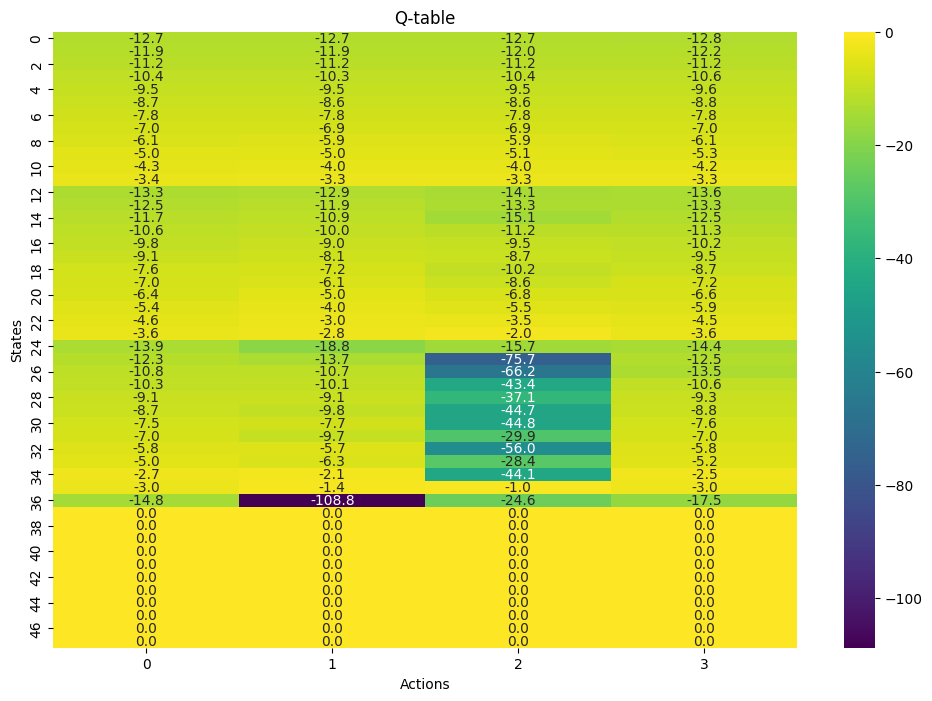

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_Q(Q):
  plt.figure(figsize=(12, 8))
  sns.heatmap(Q, annot=True, fmt=".1f", cmap="viridis")
  plt.xlabel("Actions")
  plt.ylabel("States")
  plt.title("Q-table")
  plt.show()

plot_Q(Q)

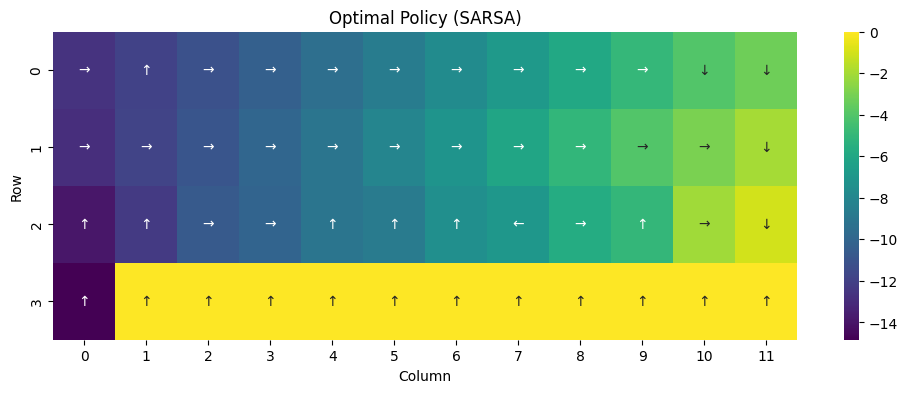

In [5]:
def plot_policy(Q, title="SARSA"):
  # Reshape Q table to a 4x12 grid
  Q_grid = Q.reshape((4, 12, n_actions))

  # Get the optimal action for each state and its corresponding Q-value
  optimal_action = np.argmax(Q_grid, axis=2)
  optimal_policy_Q = np.max(Q_grid, axis=2)


  # Define arrow mapping based on action space (0: up, 1: right, 2: down, 3: left)
  action_arrows = {0: "↑", 1: "→", 2: "↓", 3: "←"}
  optimal_policy_arrows = np.vectorize(action_arrows.get)(optimal_action)


  plt.figure(figsize=(12, 4))
  sns.heatmap(optimal_policy_Q, annot=optimal_policy_arrows, fmt="", cmap="viridis", cbar=True) # Add color bar back
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.title("Optimal Policy (SARSA)")
  plt.show()
plot_policy(Q)

## Exercise 2.1: Q: Learning
Implement Q-learning method to solve the cliff problem

In [6]:
def q_learning(slippery=False):
  global Q
  # Create the environment
  env = gym.make("CliffWalking-v0", render_mode="ansi", is_slippery=slippery)

  #helper function: generate e-greedy response from
  def e_greedy(state):
    if random.random() < e:
      #greedy policy
      return np.argmax(Q[state])
    else:
      #random policy
      return random.choice(list(range(n_actions)))

  #reset Q values
  Q = np.zeros((n_states, n_actions))

  rewards=[]
  for episode in range(n_episodes):
      state, info = env.reset()
      done = False
      total_reward = 0

      for step in range(max_steps):
        action = e_greedy(state)
        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward

        #calculate Q values
        Q[state, action] = Q[state, action] + learning_rate*(reward + discount_factor*max(Q[next_state]) - Q[state, action])

        state = next_state

        if terminated or truncated:
            break
      rewards.append(total_reward)
      #print(f"Q-Learning Episode {episode+1}: total reward = {total_reward}")

  env.close()
  return rewards

_=q_learning()

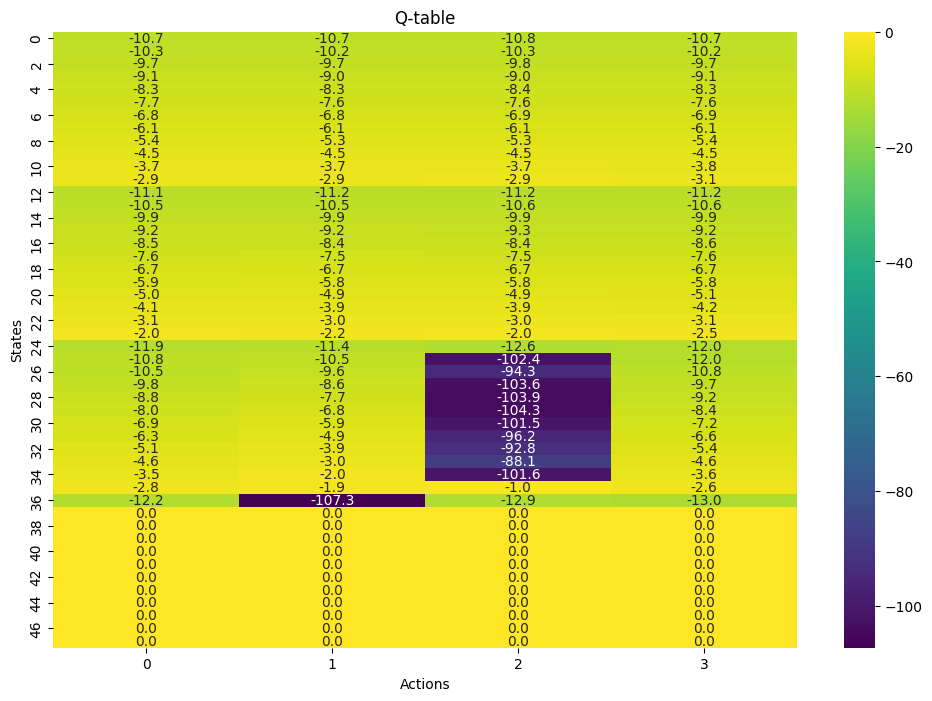

In [7]:
plot_Q(Q)

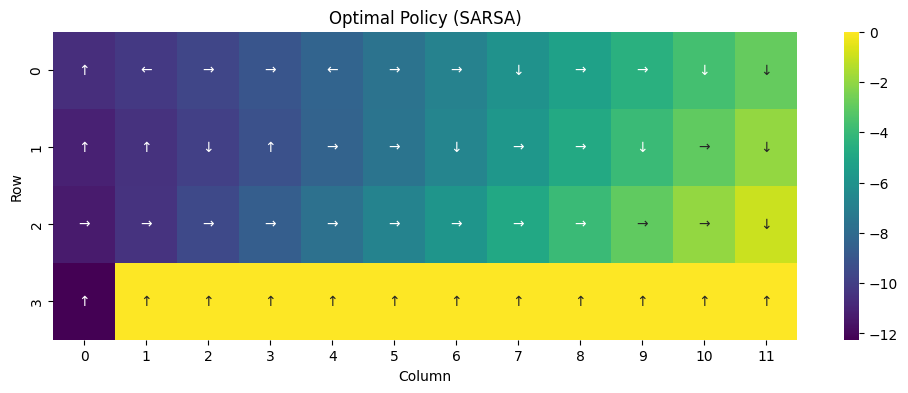

In [8]:
plot_policy(Q, "Q-Learning")

## Exercise 2.2: SARSA vs Q-learning
 1. Compare the results betwen SARSA and Q-Learning (plot a graph of the sum of rewards duing each episode for each algorithm).
 2. Include the is_slippery=True parameter. Compare again, which one is better?


In [9]:
#run each algorithm and get their rewards
sarsa_r = sarsa()
q_r = q_learning()

slippery_sarsa_r = sarsa(True)
slippery_q_r = sarsa(True)

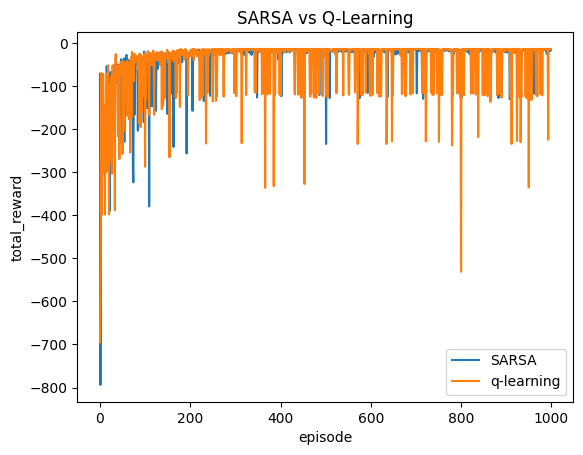

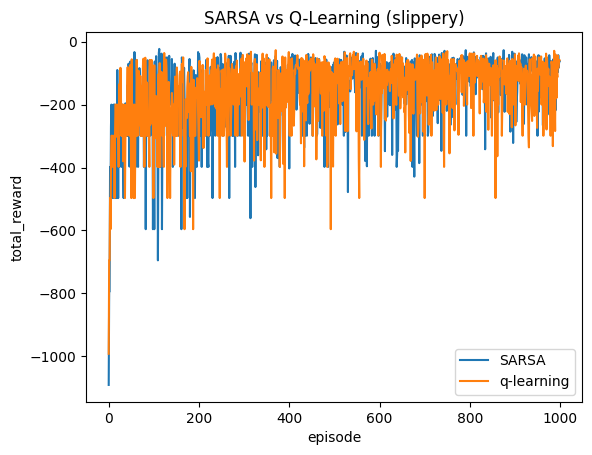

In [88]:
import matplotlib.pyplot as plt

#compare rewards in plot
plt.title("SARSA vs Q-Learning")
plt.plot(sarsa_r, label='SARSA')
plt.plot(q_r, label='q-learning')
plt.xlabel('episode')
plt.ylabel('total_reward')
plt.legend(loc='lower right')
plt.show()

plt.title("SARSA vs Q-Learning (slippery)")
plt.plot(slippery_sarsa_r, label='SARSA')
plt.plot(slippery_q_r, label='q-learning')
plt.xlabel('episode')
plt.ylabel('total_reward')
plt.legend(loc='lower right')
plt.show()

1. The Q-Learning method has the largest spikes in total_reward compared to SARSA, meaning it's taking higher risks to find the most optimal route. SARSA, on the other hand, sticks with the safest route, which is not the most optimal.
2. In the is_slippery run, SARSA is able to maintain the highest total_reward longer since it sticks to a path that takes the model further from the edge. Since Q-Learning's most optimal route is along the edge, the model will slip off the cliff more often and reach a lower total_reward more often.

# Exercise 3 (graduate students): 8x8 grid problem
Solve the 8x8 grid problem from the previous lab. You can use SARSA or Q-learning. How many episodes does it need to learn the optimal policy?
